In [2]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import os

# Benchmarking the System Performance

In [3]:
run_id = 'Algorithm1_apple_etc'

In [4]:
os.mkdir(run_id)

In [5]:
dir_ = './' + run_id + '/'

This Jupyter notebook serves to benchmark the performance of the prototype system.

### Loading and importing the system

In [189]:
%run ../tools/dataloader.py
%run ../system/activate.py

### Loading and importing financial data to forecast and to benchmark the system on

In [177]:
predict = DataLoader('^GSPC', '2018-02-01', '2018-05-01')
predict = predict.get_adjclose()

In [178]:
predict_req, real = data_prep(predict, 20, 40) # dividing data into predictor input and real data

### Individual predictor forecasts

In [190]:
individual_predictors_forecasts = individual_predictors_pretrained_SP500_40_3(predict_req, 40)

### System disagreement between individual predictor forecasts

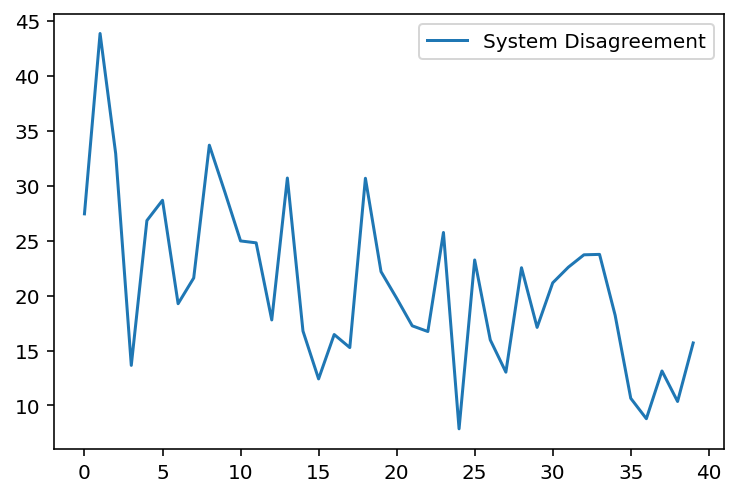

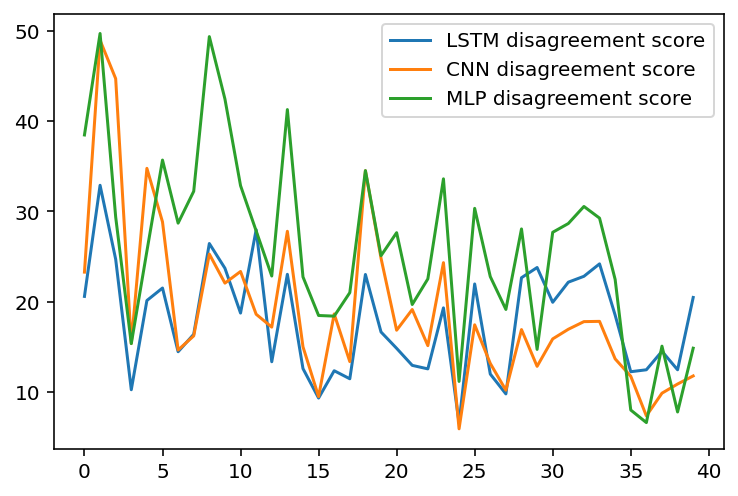

In [191]:
system_disagreement(individual_predictors_forecasts)

### Building consensus forecast values

In [192]:
consensus_forecasts = consensus(individual_predictors_forecasts, real)

In [193]:
all_forecasts = combined_frame(individual_predictors_forecasts, consensus_forecasts, real)

In [194]:
summary = all_stats_frame(all_forecasts, individual_predictors_forecasts) # combining individual predictor forecasts, consensus forecasts and disagreement scores
summary

,Average,NoMemory,Memory,Focus,Anchor,Real Value,LSTM,CNN,MLP,System Disagreement,LSTM disagreement score,CNN disagreement score,MLP disagreement score
Date,,,,,,,,,,,,,
2018-03-02,2753.924316,2753.924316,2753.924316,2753.924316,2787.832520,2691.250000,2738.724121,2730.656250,2792.392578,27.438368,20.578776,23.268066,38.468262
2018-03-05,2731.956462,2723.810814,2727.883638,2682.990234,2727.164543,2720.939941,2731.208496,2682.990234,2781.670654,43.857964,32.893473,48.966227,49.714193
2018-03-06,2736.932536,2735.809322,2734.840905,2752.266602,2725.006265,2728.120117,2752.266602,2692.222656,2766.308350,32.926975,24.695231,44.709880,29.375814
2018-03-07,2744.371094,2744.192762,2743.295770,2744.381348,2730.706416,2726.800049,2744.381348,2729.013916,2759.718018,13.646267,10.234701,15.357178,15.346924
2018-03-08,2744.245280,2735.453591,2741.355090,2709.475586,2748.074310,2738.969971,2753.419189,2709.475586,2769.841064,26.829102,20.121826,34.769694,25.595785
2018-03-09,2730.839844,2729.822449,2727.247939,2723.987061,2733.068443,2786.570068,2723.987061,2702.005371,2766.527100,28.676324,21.507243,28.834473,35.687256
2018-03-12,2741.352620,2745.966092,2739.389109,2770.051025,2749.838008,2783.020020,2727.294922,2726.711914,2770.051025,19.261827,14.446370,14.640706,28.698405
2018-03-13,2742.553874,2748.102396,2741.304256,2774.781250,2755.058736,2765.310059,2726.171875,2726.708496,2774.781250,21.604167,16.381999,16.203125,32.227376
2018-03-14,2736.914714,2745.241132,2736.110219,2786.283203,2752.239663,2749.479980,2710.476807,2713.984131,2786.283203,33.691732,26.437907,25.268799,49.368490


In [14]:
summary.to_csv(dir_ + run_id + '_Forecast_Summary.csv')

### Absolute error analysis of individual predictors and consensus forecasts

In [195]:
prediction_error = absolute_error_analytics(individual_predictors_forecasts, consensus_forecasts, real)
prediction_error

,LSTM absolute error,CNN absolute error,MLP absolute error,Average absolute error,NoMemory absolute error,Memory absolute error,Focus absolute error,Anchor absolute error,LSTM disagreement score,CNN disagreement score,MLP disagreement score,System Disagreement
Date,,,,,,,,,,,,
2018-03-02,47.474121,39.406250,101.142578,62.674316,62.674316,62.674316,62.674316,96.582520,20.578776,23.268066,38.468262,27.438368
2018-03-05,10.268555,37.949707,60.730713,11.016520,2.870873,6.943697,37.949707,6.224601,32.893473,48.966227,49.714193,43.857964
2018-03-06,24.146484,35.897461,38.188232,8.812419,7.689205,6.720787,24.146484,3.113852,24.695231,44.709880,29.375814,32.926975
2018-03-07,17.581299,2.213867,32.917969,17.571045,17.392713,16.495721,17.581299,3.906367,10.234701,15.357178,15.346924,13.646267
2018-03-08,14.449219,29.494385,30.871094,5.275309,3.516380,2.385119,29.494385,9.104340,20.121826,34.769694,25.595785,26.829102
2018-03-09,62.583008,84.564697,20.042969,55.730225,56.747620,59.322129,62.583008,53.501625,21.507243,28.834473,35.687256,28.676324
2018-03-12,55.725098,56.308105,12.968994,41.667399,37.053928,43.630911,12.968994,33.182012,14.446370,14.640706,28.698405,19.261827
2018-03-13,39.138184,38.601562,9.471191,22.756185,17.207662,24.005802,9.471191,10.251323,16.381999,16.203125,32.227376,21.604167
2018-03-14,39.003174,35.495850,36.803223,12.565267,4.238848,13.369761,36.803223,2.759682,26.437907,25.268799,49.368490,33.691732


In [16]:
prediction_error.to_csv(dir_ + run_id + '_Prediction_Errors.csv')

### Correlation matrix of individual predictor and consensus forecast absolute errors

,LSTM absolute error,CNN absolute error,MLP absolute error,Average absolute error,NoMemory absolute error,Memory absolute error,Focus absolute error,Anchor absolute error,LSTM disagreement score,CNN disagreement score,MLP disagreement score,System Disagreement
LSTM absolute error,1.000000,0.938143,0.893850,0.967944,0.966874,0.969816,0.942400,0.922507,-0.553974,-0.470051,-0.481431,-0.550379
CNN absolute error,0.938143,1.000000,0.851831,0.945976,0.948299,0.947839,0.947755,0.901502,-0.444507,-0.511731,-0.552861,-0.570921
MLP absolute error,0.893850,0.851831,1.000000,0.953647,0.948538,0.947218,0.916912,0.933648,-0.359827,-0.400124,-0.411660,-0.440291
Average absolute error,0.967944,0.945976,0.953647,1.000000,0.998916,0.999705,0.953988,0.964208,-0.501279,-0.536400,-0.534614,-0.587380
NoMemory absolute error,0.966874,0.948299,0.948538,0.998916,1.000000,0.998887,0.957434,0.963408,-0.506544,-0.541400,-0.549657,-0.597546
Memory absolute error,0.969816,0.947839,0.947218,0.999705,0.998887,1.000000,0.953368,0.964474,-0.507628,-0.545558,-0.536394,-0.593520
Focus absolute error,0.942400,0.947755,0.916912,0.953988,0.957434,0.953368,1.000000,0.931039,-0.461421,-0.465795,-0.499385,-0.532705
Anchor absolute error,0.922507,0.901502,0.933648,0.964208,0.963408,0.964474,0.931039,1.000000,-0.416489,-0.473989,-0.420582,-0.488782
LSTM disagreement score,-0.553974,-0.444507,-0.359827,-0.501279,-0.506544,-0.507628,-0.461421,-0.416489,1.000000,0.676455,0.726316,0.859868
CNN disagreement score,-0.470051,-0.511731,-0.400124,-0.536400,-0.541400,-0.545558,-0.465795,-0.473989,0.676455,1.000000,0.702255,0.895168


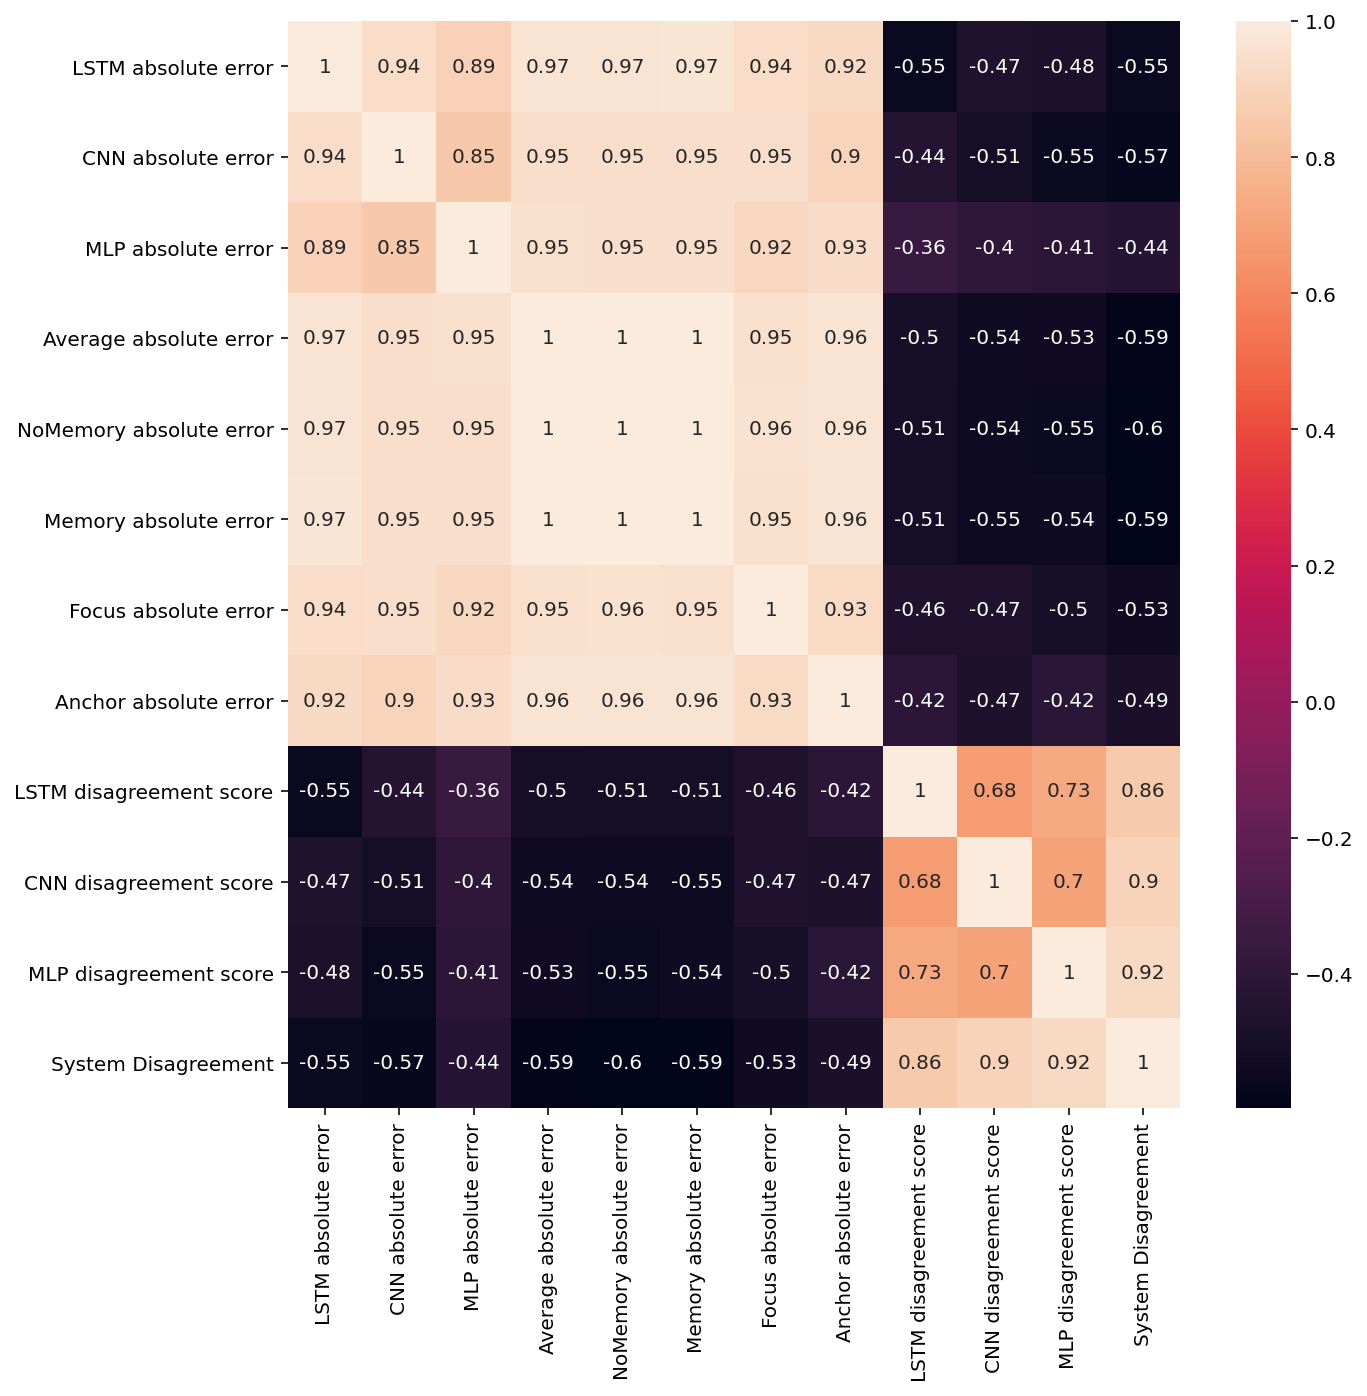

In [196]:
correlation_ = correlation(prediction_error, True)
correlation_

In [20]:
correlation_.to_csv(dir_ + run_id + '_Error_Correlation.csv')

### MAE, MSE and MSE log scores

,Algorithms,MSE
0,Average,9799.849059
1,NoMemory,9550.275636
2,Memory,9641.466225
3,Focus,7591.825973
4,Anchor,6104.799025
5,LSTM,8250.314539
6,CNN,8790.858655
7,MLP,13735.230145


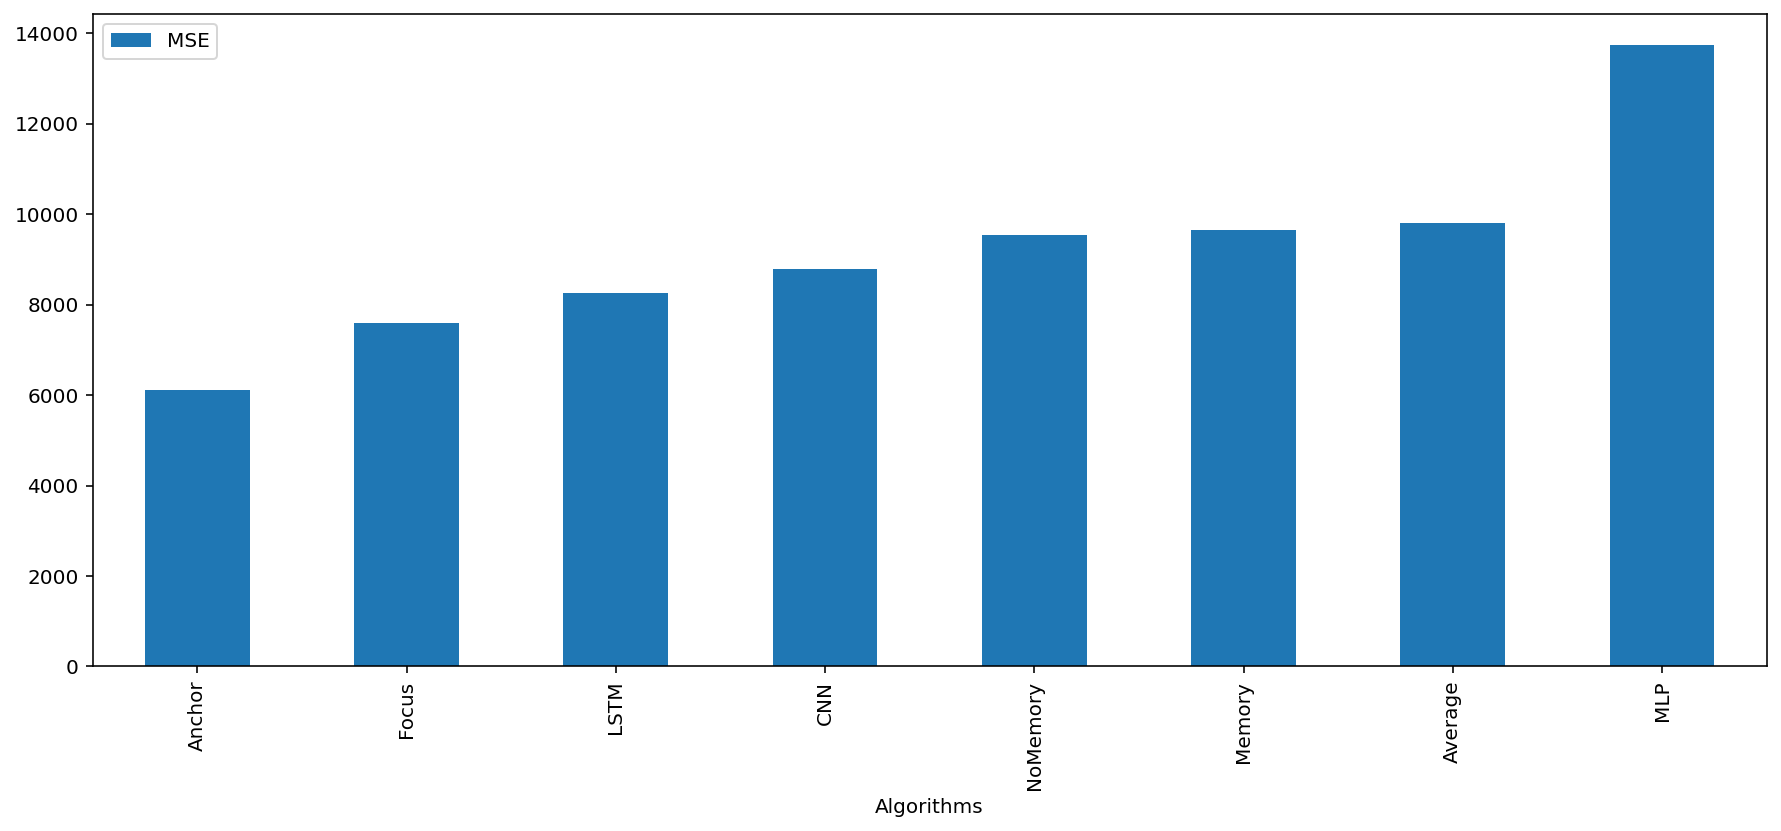

In [197]:
mse = mse_score(all_forecasts, True)
mse

In [22]:
mse.to_csv(dir_ + run_id + '_MSE_score.csv')

,Algorithms,MSE Log
0,Average,0.001345
1,NoMemory,0.001312
2,Memory,0.001324
3,Focus,0.001048
4,Anchor,0.000846
5,LSTM,0.001137
6,CNN,0.001208
7,MLP,0.001868


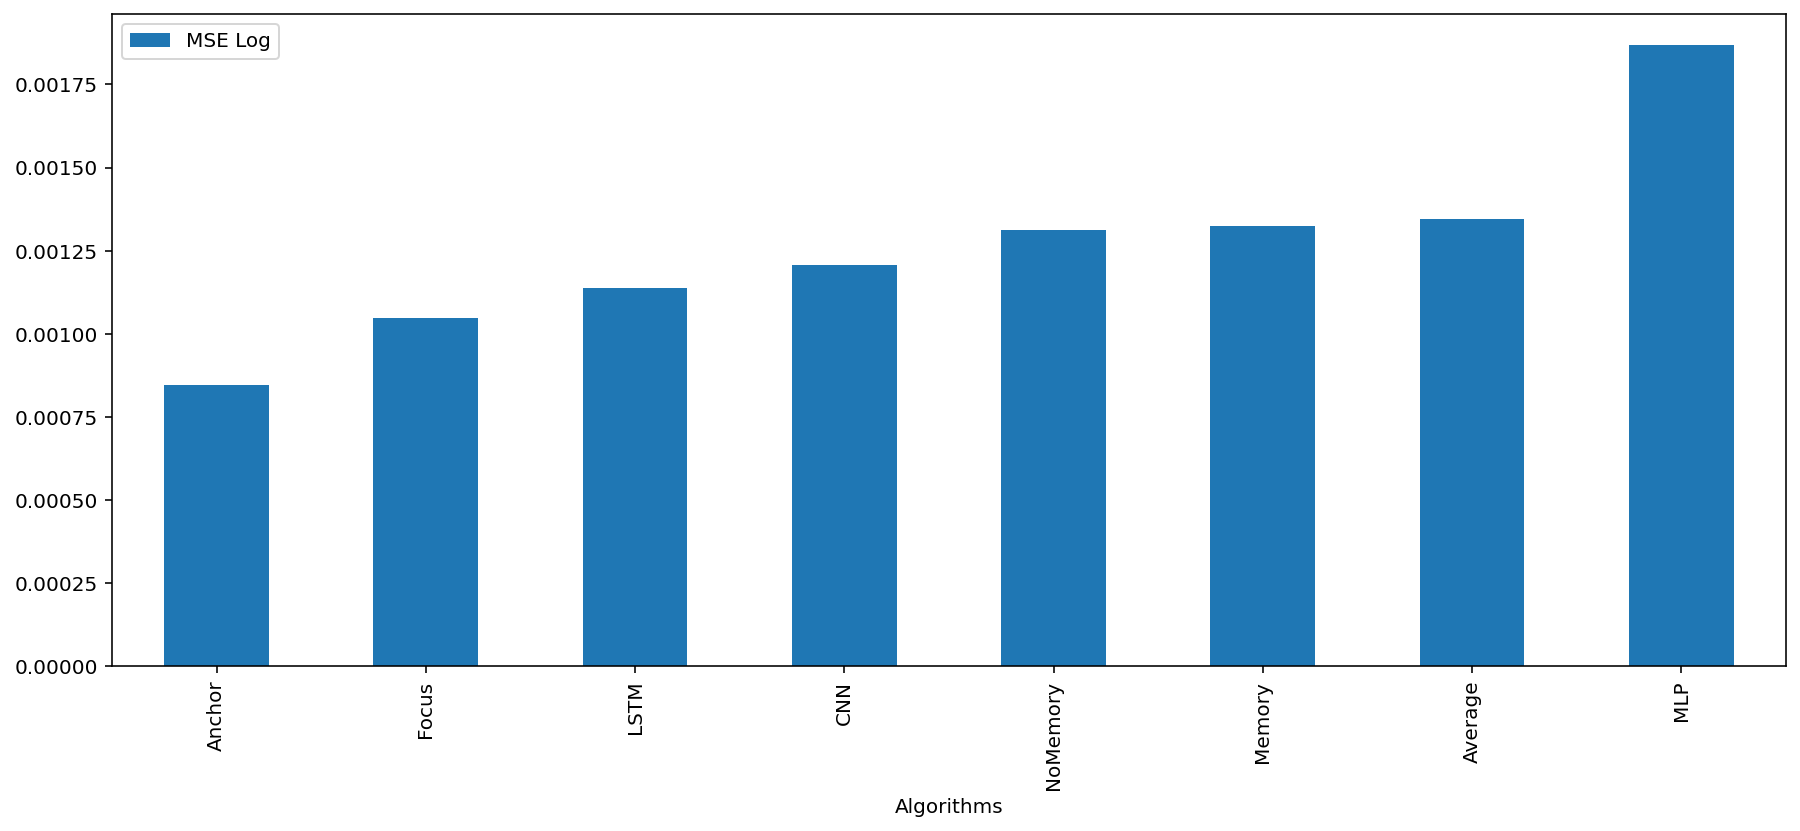

In [198]:
mse_log = mse_log_score(all_forecasts, True)
mse_log

In [24]:
mse_log.to_csv(dir_ + run_id + '_MSE_log_score.csv')

,Algorithms,MAE
0,Average,84.687612
1,NoMemory,82.546174
2,Memory,83.855335
3,Focus,75.426563
4,Anchor,66.072977
5,LSTM,78.147498
6,CNN,82.169562
7,MLP,103.751843


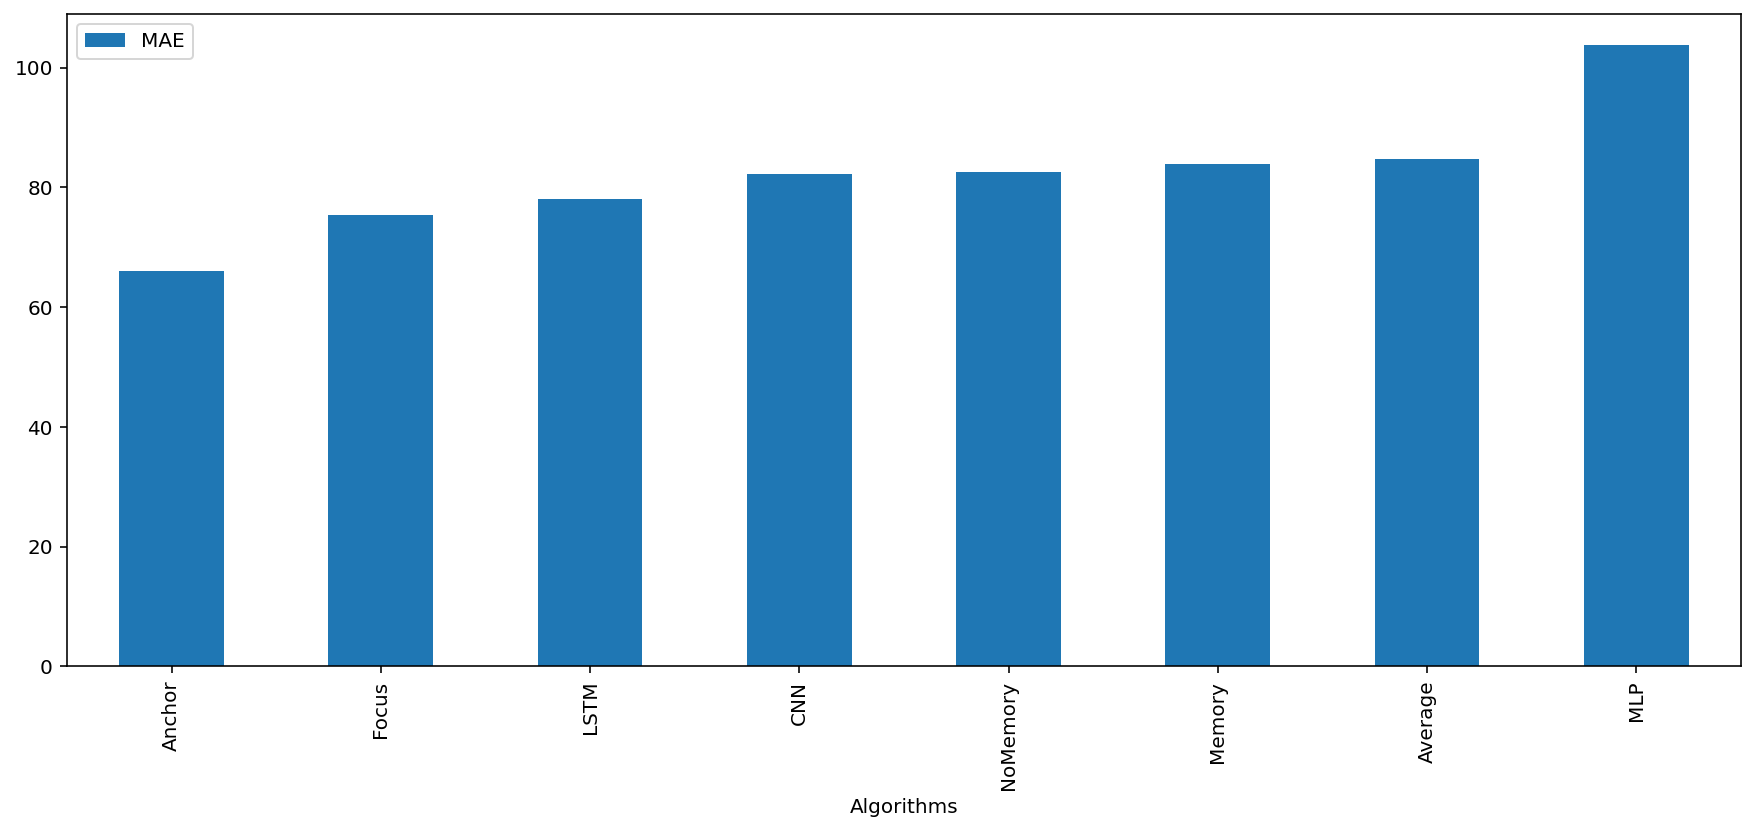

In [199]:
mae = mae_score(all_forecasts, True)
mae

In [26]:
mae.to_csv(dir_ + run_id + '_MAE_score.csv')

### Performance plotting of all forecasting algorithms

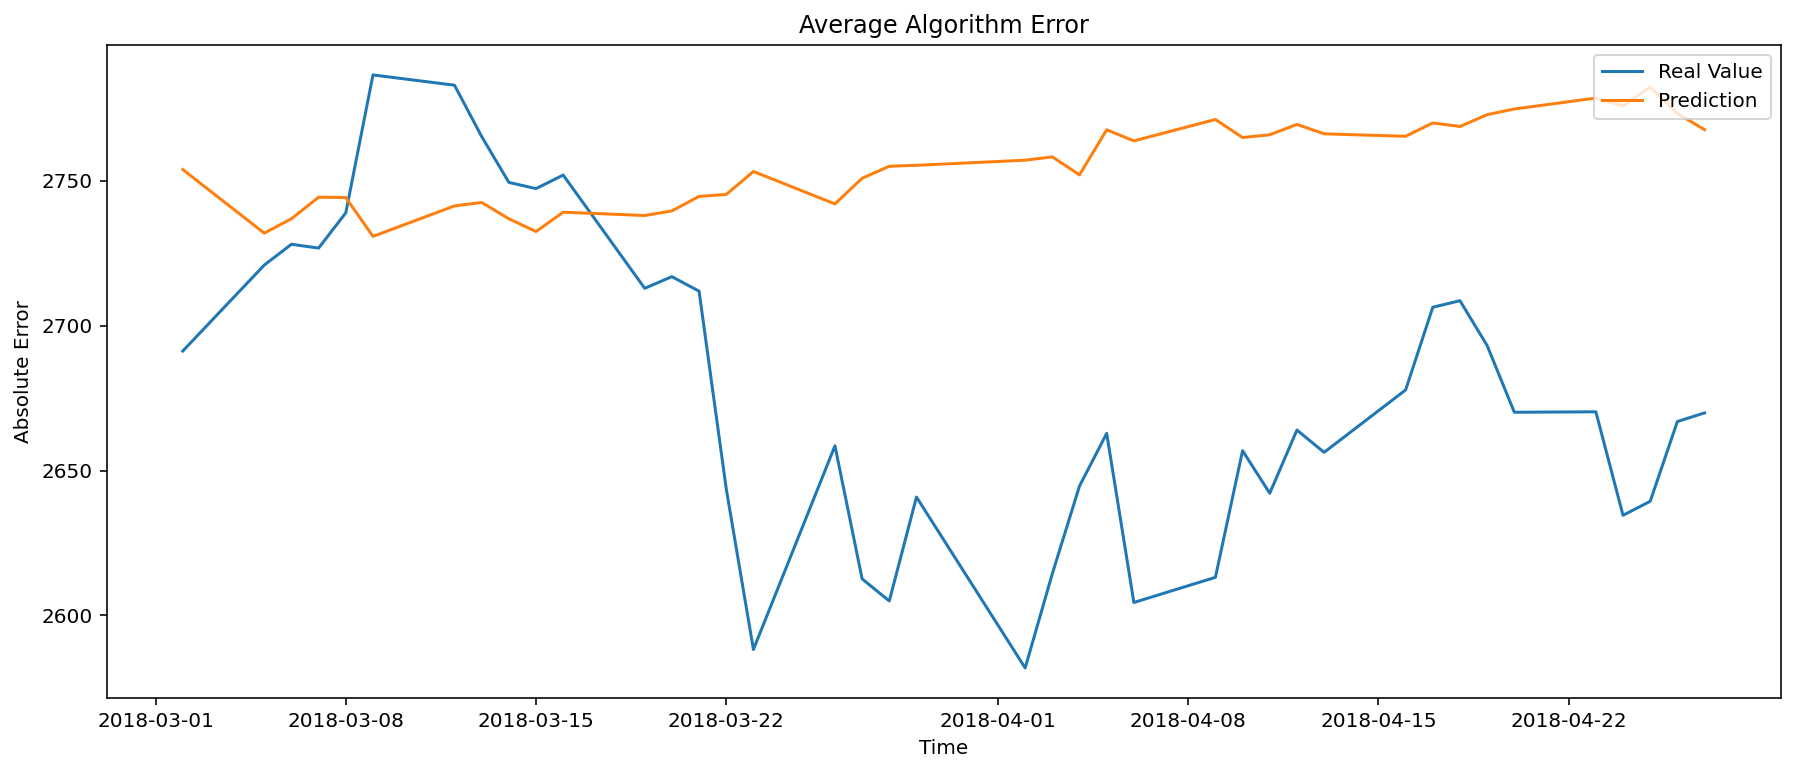

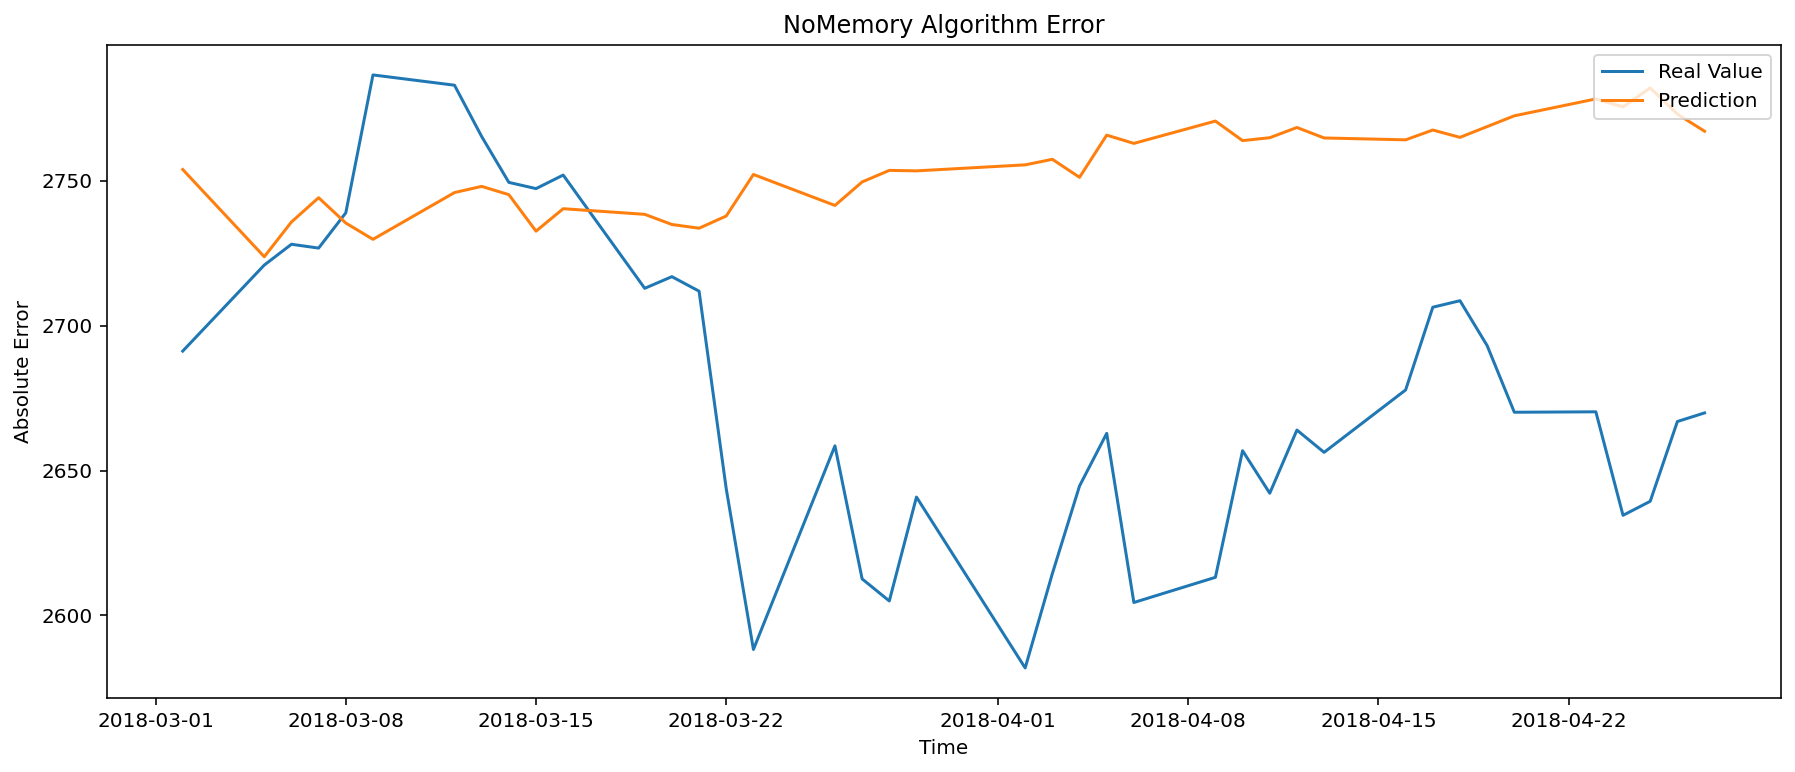

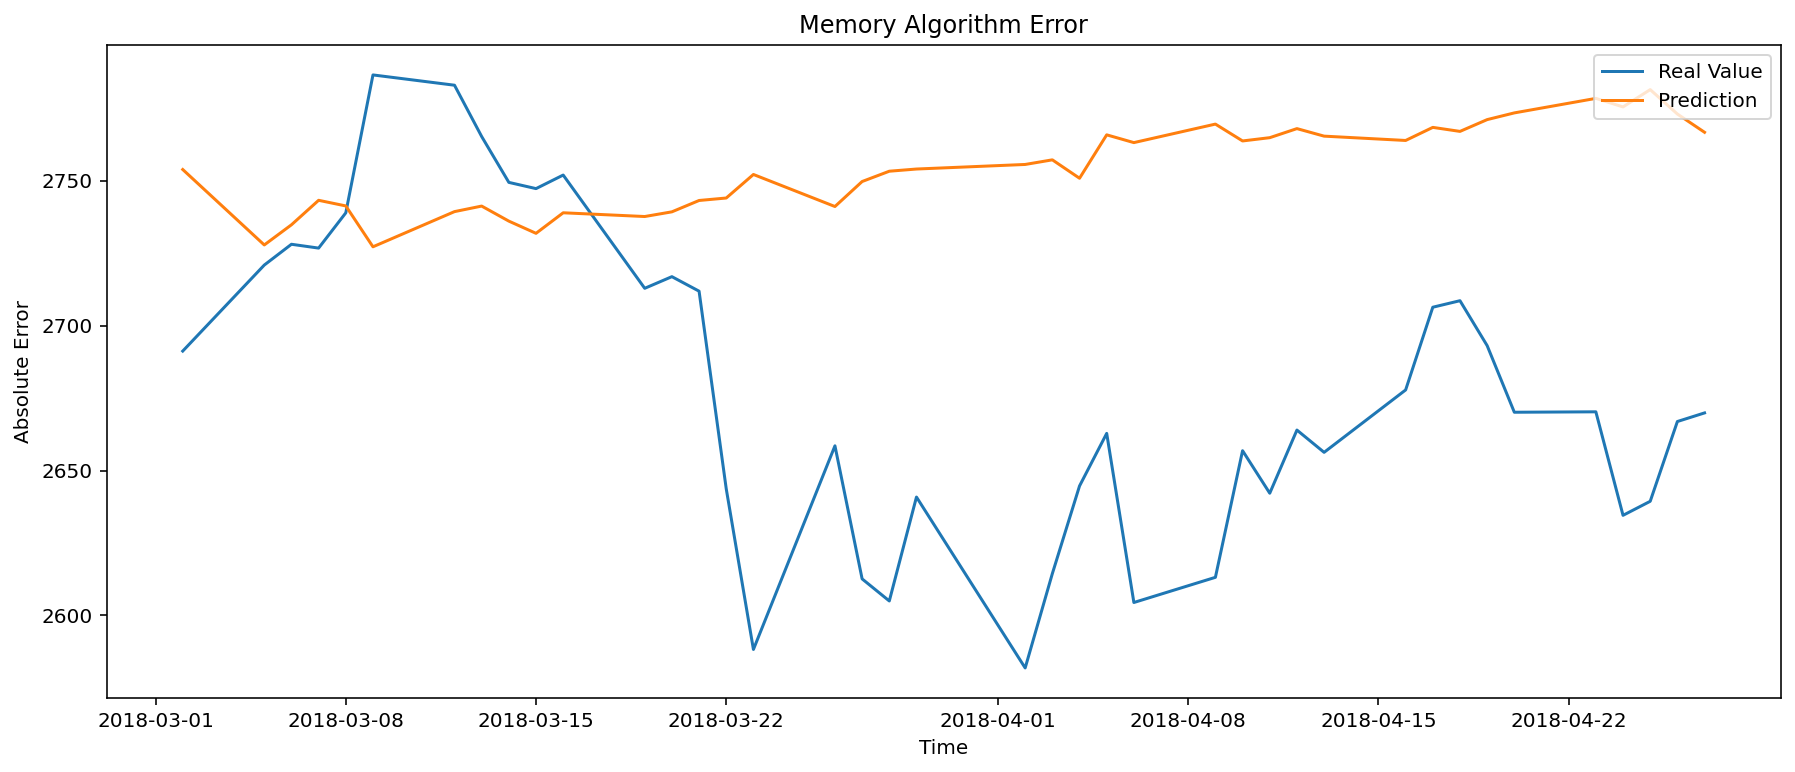

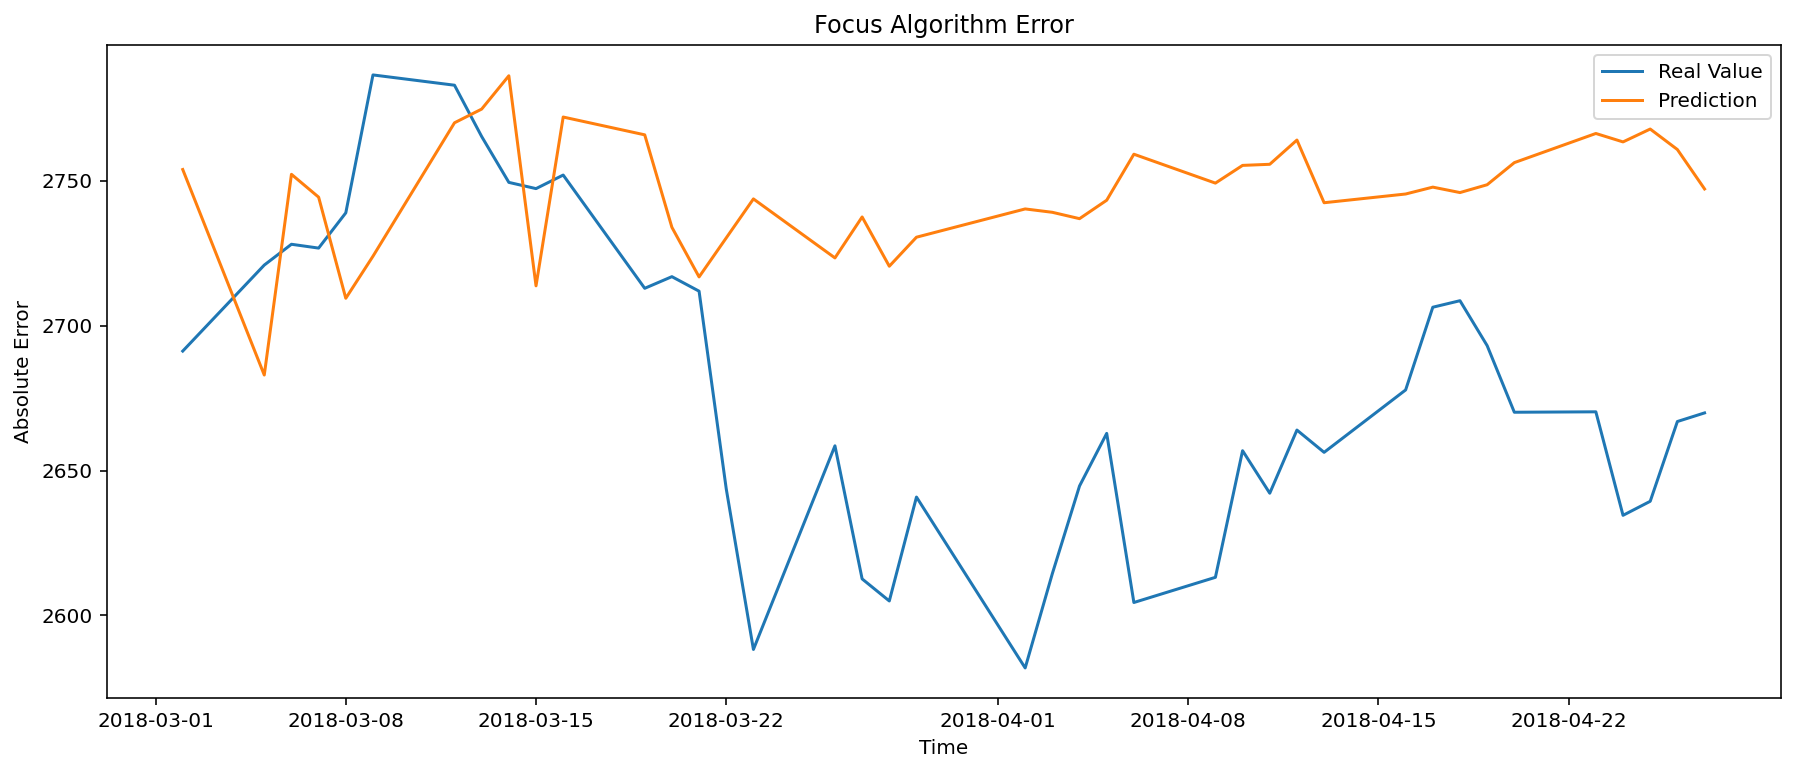

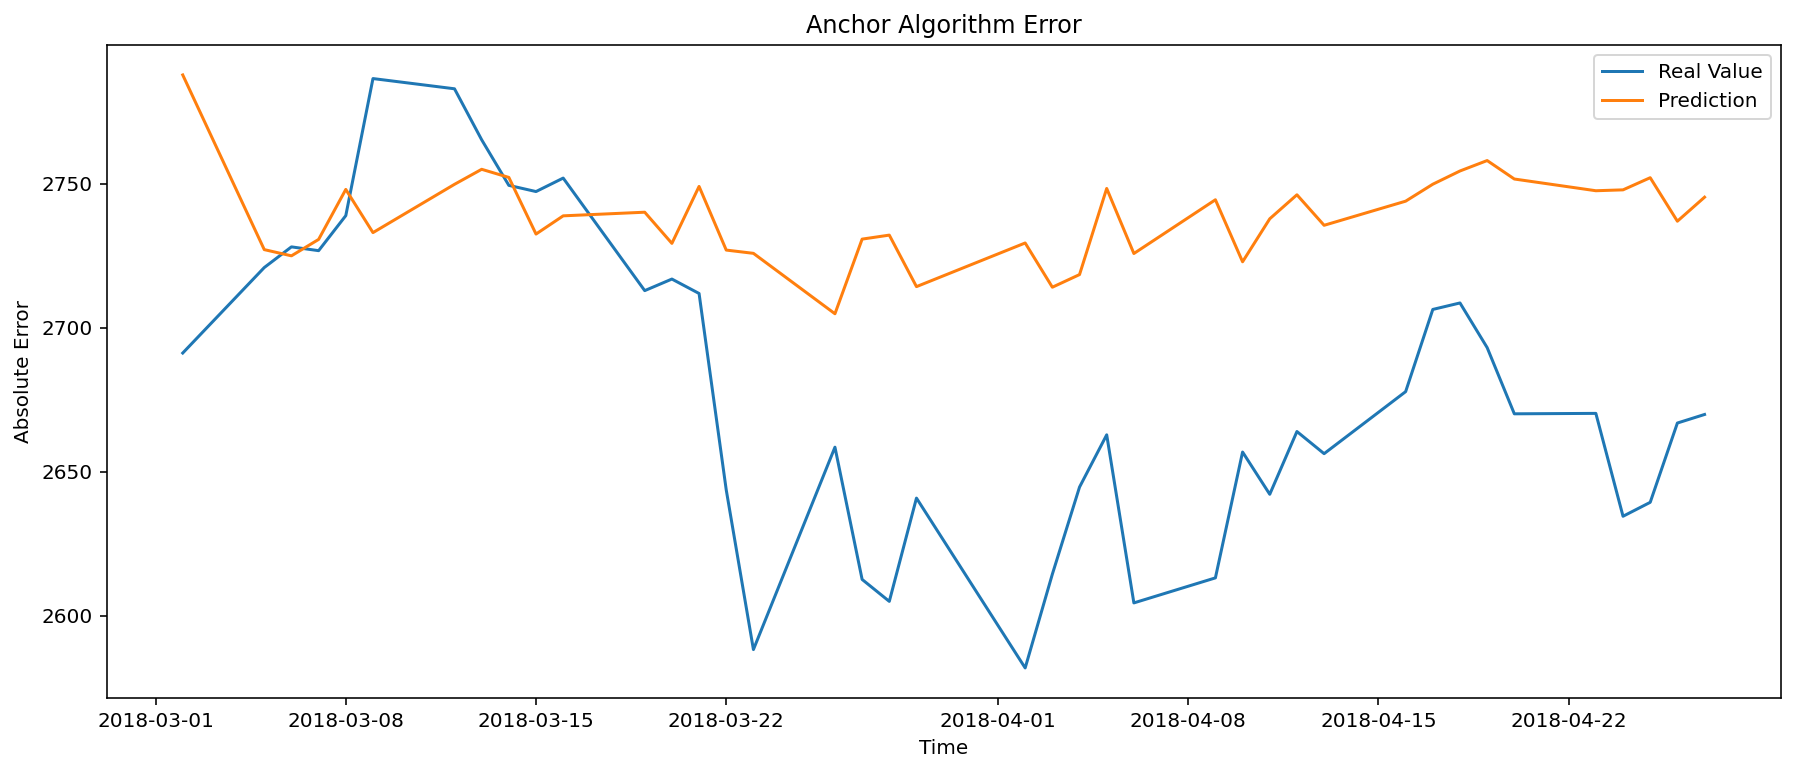

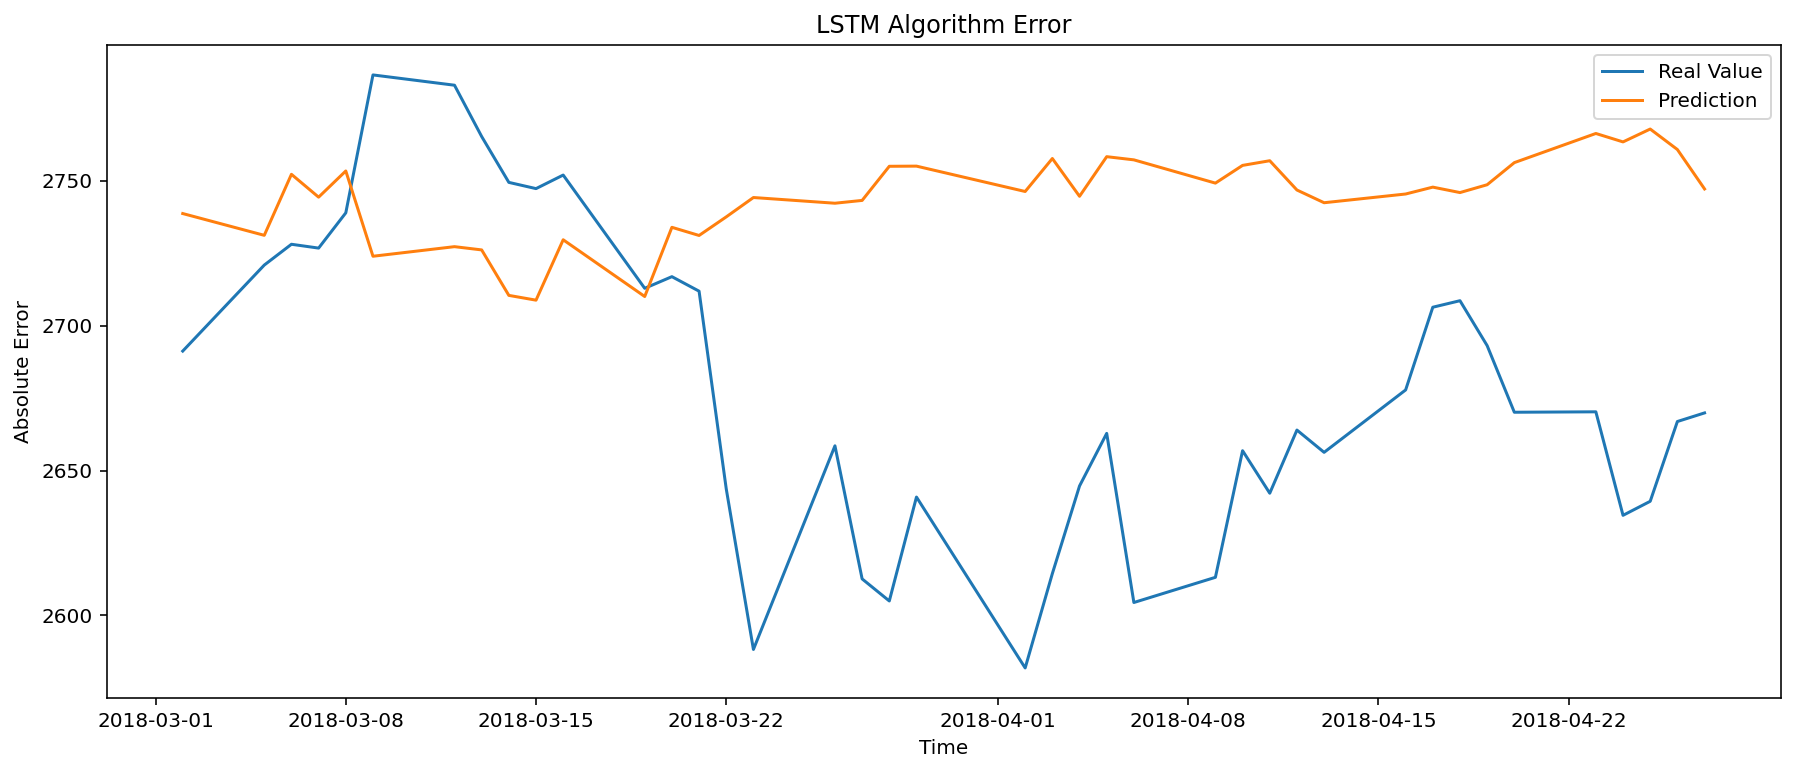

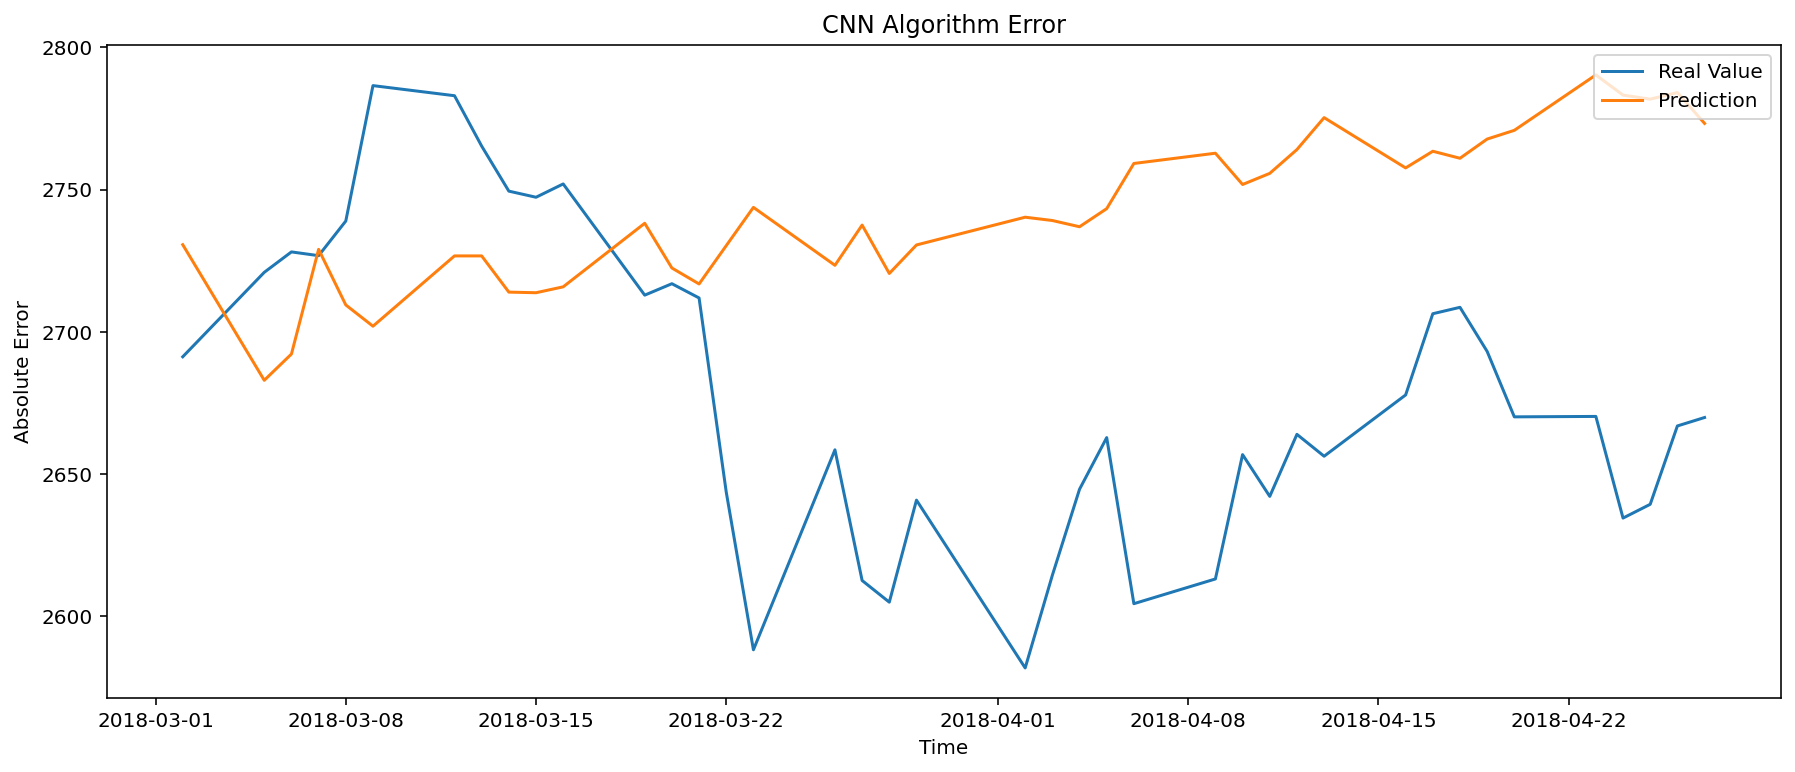

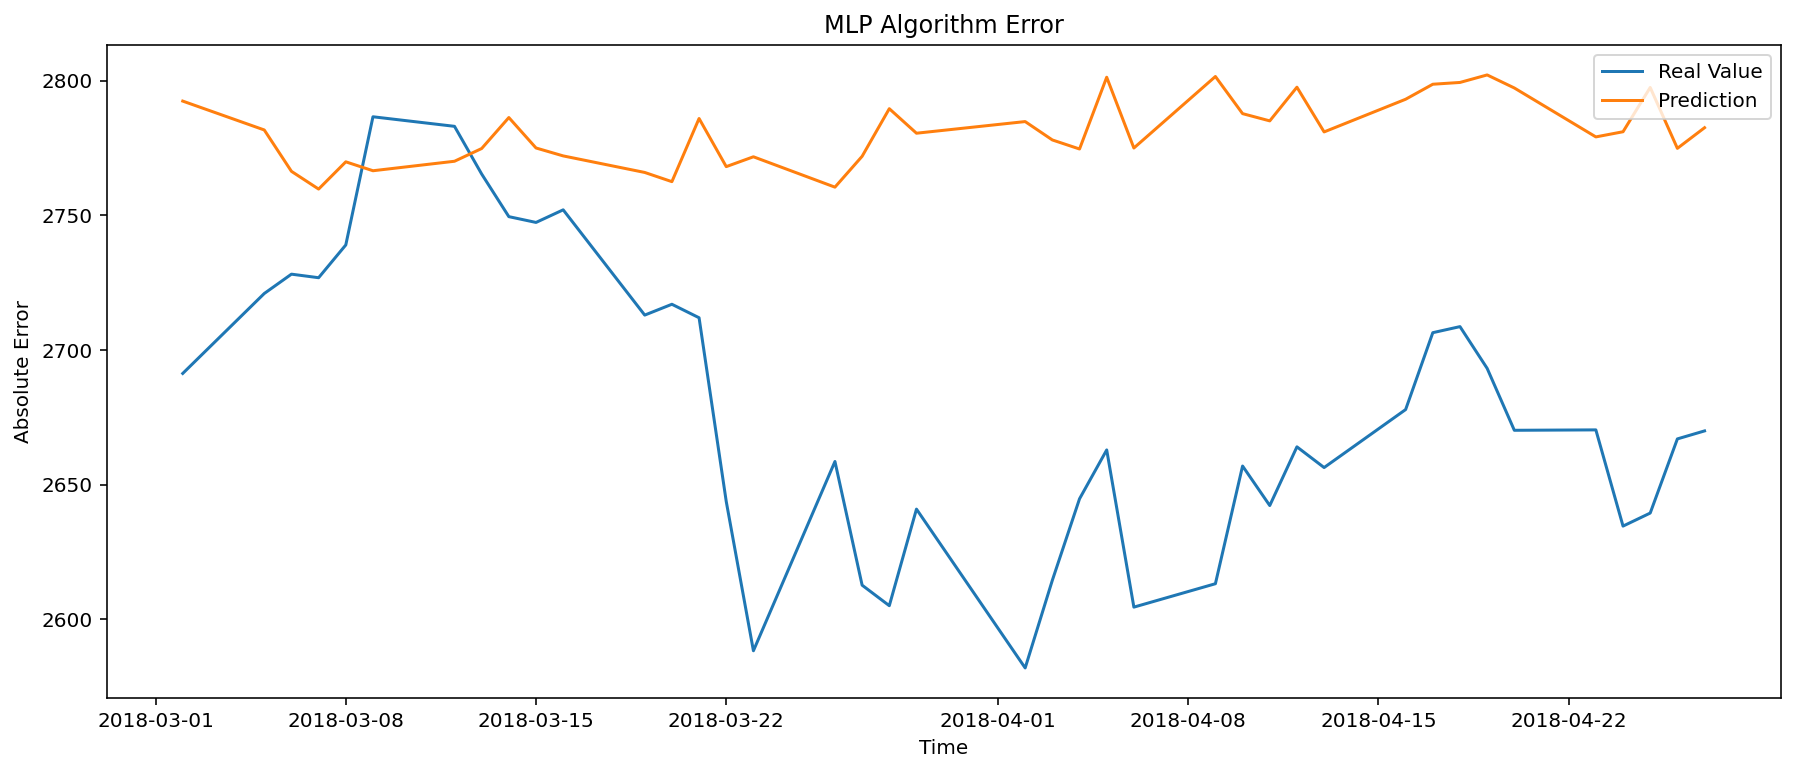

In [200]:
plot_performance(all_forecasts)